In [1]:
from __future__ import print_function
import keras
from keras.models import Sequential, Model, load_model
from keras import backend as K
import tensorflow as tf
import isolearn.keras as iso
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from keras.utils import plot_model


from aparent.predictor import *
##################################################
#import bioPython for working with FASTA files
from Bio import SeqIO
##################################################


Using TensorFlow backend.
/home/lafleur1/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/lafleur1/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/lafleur1/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/lafleur1/.local/lib/python3.6/site-packages/tensorflo

In [2]:
#open the FASTA for GL000219.1 (https://www.ncbi.nlm.nih.gov/nuccore/GL000219.1?report=fasta) unplaced human genomic assembly

#bioPython instructions http://biopython.org/DIST/docs/tutorial/Tutorial.html 
contigSeq = SeqIO.read("GL000219.1.fasta", "fasta")
seq = contigSeq.seq #actual genomic sequence from the file
print (len(seq))

179198


In [3]:
#loading model
aparent_model = load_model('./saved_models/aparent_large_lessdropout_all_libs_no_sampleweights.h5')
plot_model(aparent_model, show_shapes = True, to_file='APARENTmodel.png')
aparent_encoder = get_aparent_encoder(lib_bias=4)


/home/lafleur1/.local/lib/python3.6/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '



[8.20673961e-07 8.76481636e-07 7.72374885e-07 ... 1.93512354e-05
 2.17373354e-05 3.48301978e-06]
[8.20673961e-07 8.76481636e-07 7.72374885e-07 ... 1.93512354e-05
 2.17373354e-05 3.48301978e-06]


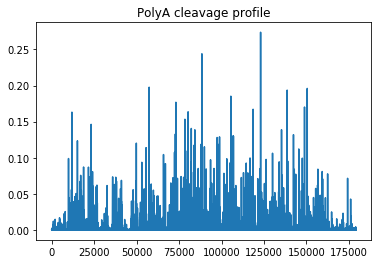

In [4]:
#detecting peaks with signal smoothing for 

chunk = seq
#predict where polyA will occur based on values of cut site predictions from APARENT model
x,y = find_polya_peaks_memoryFriendly(
    aparent_model,
    aparent_encoder,
    chunk,
    sequence_stride=1,
    conv_smoothing=False,
    peak_min_height=0.01,
    peak_min_distance=50,
    peak_prominence=(0.01, None),
)

"""
totalCut = np.zeros(len(chunk))
totalMask = np.zeros(len(chunk))
for i in range(0,numberfiles+1):
    
    totalCut = totalCut  + np.load("./numpyFiles/TESTINGPredSlices" + str(i) + ".npy")[:,:-1]
    totalMask = totalMask + np.load("./numpyFiles/TESTINGMaskSlices" + str(i) + ".npy")[:,:-1]
    
avgs = totalCut/totalMask
"""
print (max(y))
print (min(y))
np.save("GL000219_1_cutPreds", y)
x_data = np.arange(0,len(chunk))
plt.plot(x_data, y[0])
plt.title("PolyA cleavage profile")
plt.show()

In [5]:
#detecting peaks
#playing with aparent.predict -> what is happening in there???
